In [1]:
from utils.video_dataset import VideoFrameDataset
from config.torch_config import get_transform, device, reverse_transform
from config.dataset import get_dataset_path


In [2]:
NUM_SEGMENTS = 2
FRAMES_PER_SEGMENT = 5
BATCH_SIZE = 64
IMAGE_SIZE = 224
NUM_EPOCHS = 50
LEARNING_RATE = 0.001


In [3]:
data_path, model_path = get_dataset_path()
multiple_transform = get_transform(IMAGE_SIZE)


In [4]:
dataset = VideoFrameDataset(
    root_path=data_path,
    transform=multiple_transform,
    num_segments=NUM_SEGMENTS,
    frames_per_segment=FRAMES_PER_SEGMENT,
)

classes = dataset.classes


In [5]:
from utils.loader import split_dataset


In [6]:
train_loader, test_loader, validation_loader = split_dataset(
    dataset, train_split=0.7, validation_split=0.1, batch_size=BATCH_SIZE
)


In [7]:
print(len(train_loader), len(validation_loader), len(test_loader))


4 1 1


### Example of input of net.

> Initial input = [BATCH_SIZE, NUMBER_OF_FRAMES, CHANNELS, HEIGHT, WIDTH]

This example shows first example (first video) in first batch

In [8]:
first_batch = next(iter(train_loader))
first_video = first_batch[0]
first_frame = first_video[0]

unormalized_frame = reverse_transform(first_frame)
unormalized_frame

tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]],

         [[5.3406e-08, 5.3406e-08, 5.3406e-08,  ..., 5.3406e-08,
           5.3406e-08, 5.3406e-08],
          [5.3406e-08, 5.3406e-08, 5.3406e-08,  ..., 5.3406e-08,
           5.3406e-08, 5.3406e-08],
          [5.3406e-08, 5.3406e-08, 5.3406e-08,  ..., 5.3406e-08,
           5.3406e-08, 5.3406e-08],
          ...,
          [5.3406e-08, 5.3406e-08, 5.3406e-08,  ..., 5.3406

In [9]:
from utils.balance import check_balance_status


In [10]:
# check_balance_status(test_loader, classes)
# check_balance_status(train_loader, classes)


In [11]:
from lib.model import resnet18 as resnet

model = resnet(sample_duration=FRAMES_PER_SEGMENT*NUM_SEGMENTS, sample_size=IMAGE_SIZE, num_classes=len(classes))


In [12]:
# from lib.simple_model import HPNet

# model = HPNet(
#     num_classes=len(classes),
#     batch_size=BATCH_SIZE,
#     num_frames=FRAMES_PER_SEGMENT * NUM_SEGMENTS,
#     image_size=IMAGE_SIZE,
# )

# model

In [13]:
from lib.train import train_model


In [14]:
costs, val_costs = train_model(
    model,
    train_loader,
    validation_loader,
    device,
    learning_rate=LEARNING_RATE,
    num_epochs=NUM_EPOCHS,
)


Training on device: cuda
Train cost at epoch 1 is 2.81465
Validation cost at epoch 1 is 28.32863
Train cost at epoch 2 is 2.51476
Validation cost at epoch 2 is 36.71241
Train cost at epoch 3 is 2.69012
Validation cost at epoch 3 is 53.13446
Train cost at epoch 4 is 2.29428
Validation cost at epoch 4 is 23.62959
Train cost at epoch 5 is 2.04807
Validation cost at epoch 5 is 13.17315
Train cost at epoch 6 is 2.09511
Validation cost at epoch 6 is 7.44989
Train cost at epoch 7 is 1.84033
Validation cost at epoch 7 is 3.44200
Train cost at epoch 8 is 2.01262
Validation cost at epoch 8 is 3.32179
Train cost at epoch 9 is 2.05570
Validation cost at epoch 9 is 3.19967
Train cost at epoch 10 is 1.60725
Validation cost at epoch 10 is 3.09863
Train cost at epoch 11 is 1.77417
Validation cost at epoch 11 is 2.80858
Train cost at epoch 12 is 1.62765
Validation cost at epoch 12 is 3.03953
Train cost at epoch 13 is 1.72573
Validation cost at epoch 13 is 2.53352
Train cost at epoch 14 is 1.52831
Valid

### Normalize costs between 0 and 1

In [15]:
import numpy as np


In [16]:
norm_costs = [x / np.max(costs) for x in costs]
norm_val_costs = [x / np.max(val_costs) for x in val_costs]

In [17]:
import matplotlib.pyplot as plt


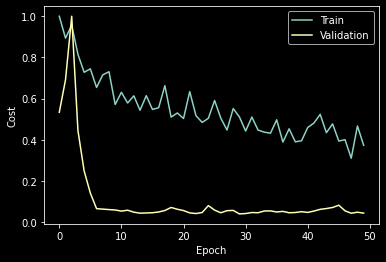

In [18]:
# Normalized costs. Does not represent real cost values.

x = range(len(costs))

plt.plot(x, norm_costs, norm_val_costs)
plt.ylabel("Cost")
plt.xlabel("Epoch")

plt.legend(["Train", "Validation"])

plt.show()


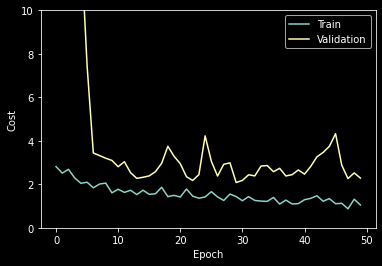

In [19]:
x = range(len(costs))

plt.plot(x, costs, val_costs)
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.ylim(0, 10)

plt.legend(["Train", "Validation"])

plt.show()


In [20]:
from lib.test import check_accuracy


In [21]:
check_accuracy(train_loader, model, classes, device)


Predictions for batch 1 
['go', 'cousin', 'go', 'chair', 'go', 'book', 'candy', 'cousin', 'computer', 'who', 'computer', 'computer', 'cousin', 'go', 'book', 'who', 'computer', 'book', 'candy', 'computer', 'go', 'who', 'go', 'candy', 'chair', 'computer', 'chair', 'book', 'cousin', 'drink', 'candy', 'go', 'go', 'who', 'go', 'chair', 'drink', 'go', 'who', 'go', 'computer', 'drink', 'candy', 'book', 'go', 'drink', 'computer', 'cousin', 'candy', 'drink', 'who', 'computer', 'candy', 'chair', 'go', 'clothes', 'who', 'cousin', 'who', 'candy', 'drink', 'drink', 'go', 'cousin']
Ground truth for batch 1
['go', 'cousin', 'computer', 'chair', 'chair', 'book', 'who', 'cousin', 'computer', 'drink', 'candy', 'computer', 'cousin', 'go', 'book', 'who', 'clothes', 'book', 'candy', 'drink', 'go', 'who', 'go', 'candy', 'chair', 'candy', 'chair', 'book', 'cousin', 'drink', 'candy', 'go', 'clothes', 'who', 'go', 'chair', 'drink', 'go', 'who', 'drink', 'computer', 'before', 'candy', 'book', 'who', 'drink', 'd

In [22]:
check_accuracy(test_loader, model, classes, device)

Predictions for batch 1 
['computer', 'computer', 'candy', 'chair', 'drink', 'who', 'computer', 'book', 'computer', 'go', 'computer', 'go', 'book', 'candy', 'cousin', 'candy', 'cousin', 'computer', 'computer', 'book', 'drink', 'go', 'computer', 'computer', 'book', 'candy', 'candy', 'who', 'cousin', 'cousin', 'computer', 'go', 'computer', 'who', 'cousin', 'cousin', 'book', 'candy', 'computer', 'go', 'computer', 'computer', 'cousin', 'chair', 'computer', 'book', 'computer', 'cousin', 'go', 'computer', 'book', 'go', 'computer', 'candy', 'computer', 'cousin', 'who']
Ground truth for batch 1
['book', 'go', 'computer', 'book', 'clothes', 'who', 'clothes', 'book', 'go', 'go', 'clothes', 'go', 'book', 'cousin', 'drink', 'book', 'before', 'cousin', 'computer', 'book', 'before', 'go', 'clothes', 'computer', 'candy', 'who', 'book', 'before', 'go', 'before', 'clothes', 'cousin', 'candy', 'before', 'go', 'drink', 'clothes', 'candy', 'before', 'drink', 'chair', 'computer', 'cousin', 'chair', 'comput

In [23]:
check_accuracy(validation_loader, model, classes, device)

Predictions for batch 1 
['go', 'book', 'book', 'candy', 'book', 'computer', 'chair', 'chair', 'who', 'drink', 'candy', 'book', 'book', 'who', 'book', 'chair', 'book', 'book', 'clothes', 'computer', 'go', 'clothes', 'drink', 'computer', 'book', 'cousin', 'computer']
Ground truth for batch 1
['cousin', 'computer', 'book', 'before', 'clothes', 'before', 'chair', 'chair', 'drink', 'drink', 'who', 'book', 'book', 'chair', 'chair', 'chair', 'book', 'book', 'clothes', 'go', 'book', 'clothes', 'computer', 'chair', 'chair', 'who', 'drink']
---------------------------------


Got 11 / 27 with accuracy 40.74
